In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
x0=0.25
p0=0.05
hbar=0.004
re_co=x0/np.sqrt(2*hbar)
im_co=p0/np.sqrt(2*hbar)
N=50
psi0=coherent(N,re_co+1j*im_co)

In [2]:
H0=hbar*(num(N)+0.5*qeye(N))+(hbar**2/16)*(create(N)+destroy(N))**4
H1=-1*np.sqrt(hbar/2)*(create(N)+destroy(N))
H0=H0/hbar
H1=H1/hbar

In [3]:
F=0.015
w=1.06
gamma=0.01
T=2*np.pi/w
args={'F':F,'w':w}
kT=2*hbar
nbar=1/(np.exp(hbar/kT)-1)
print(nbar)

1.5414940825367982


In [4]:
H=[H0,[H1,'F*cos(w*t)']]



In [5]:
times=np.arange(0,300*T,0.1)

In [6]:
collapseOp=[np.sqrt(gamma*(1+nbar))*destroy(N),np.sqrt(gamma*nbar)*create(N)]


In [7]:
result=mesolve(H,psi0,times,collapseOp,[],args=args,progress_bar=True)

10.0%. Run time:   4.68s. Est. time left: 00:00:00:42
20.0%. Run time:   9.64s. Est. time left: 00:00:00:38
30.0%. Run time:  14.30s. Est. time left: 00:00:00:33
40.0%. Run time:  19.06s. Est. time left: 00:00:00:28
50.0%. Run time:  23.82s. Est. time left: 00:00:00:23
60.0%. Run time:  28.94s. Est. time left: 00:00:00:19
70.0%. Run time:  33.92s. Est. time left: 00:00:00:14
80.0%. Run time:  39.27s. Est. time left: 00:00:00:09
90.0%. Run time:  43.97s. Est. time left: 00:00:00:04
Total run time:  48.79s


In [8]:
xvec=np.linspace(-0.5,0.5,100)
gv=np.sqrt(2/hbar)

In [9]:
W=wigner(result.states[-1],xvec,xvec,g=gv)

In [10]:
import matplotlib as mpl
from matplotlib import cm

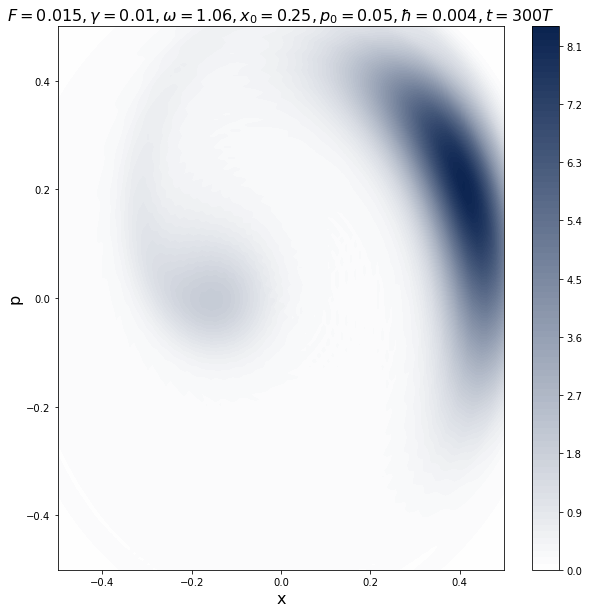

In [11]:
wmap=wigner_cmap(W)
nrm = mpl.colors.Normalize(-W.max(), W.max())
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
plt.figure(figsize=(10,10))
plt.contourf(xvec,xvec,W,100,cmap=wmap)
plt.colorbar()

plt.title(r'$F=0.015,\gamma=0.01,\omega=$'+str(1.06)+r'$,x_0=0.25,p_0=0.05,\hbar=0.004,t=300T$')
plt.xlabel('x')
plt.ylabel('p')
#plt.savefig('C:/Users/Sudipta Nayak/Pictures/wigner_0temp_w=1.06_T=300_N=50.png')
plt.show()

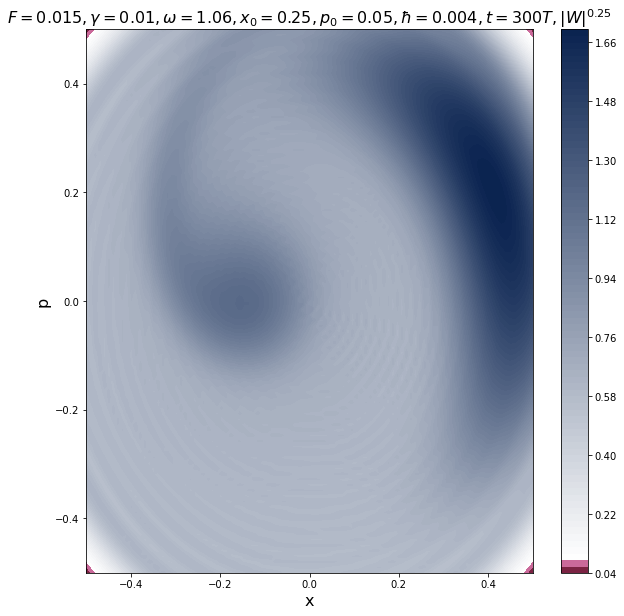

In [12]:
data=np.multiply(np.sign(W),np.power(np.abs(W),0.25))
wmap=wigner_cmap(data)
nrm = mpl.colors.Normalize(-data.max(), data.max())
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
plt.figure(figsize=(10,10))
plt.contourf(xvec,xvec,data,100,cmap=wmap)
plt.colorbar()
plt.title(r'$F=0.015,\gamma=0.01,\omega=1.06,x_0=0.25,p_0=0.05,\hbar=0.004,t=300T, |W|^{0.25}$')
plt.xlabel('x')
plt.ylabel('p')
#plt.savefig('C:/Users/Sudipta Nayak/Pictures/wigner_0temp_w=1.06_T=300_N=50_powerquartered.png')

plt.show()

In [14]:
from celluloid import Camera as cm

In [46]:
wlist=np.arange(1.01,1.1,0.003)
print(len(wlist))

31


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


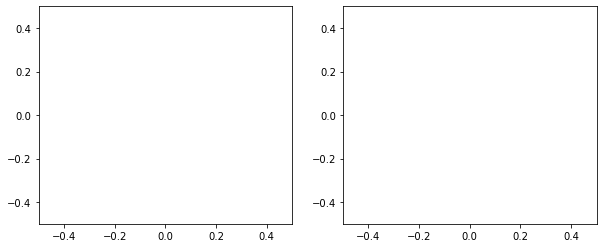

In [47]:
times=np.arange(0,300*T,0.1)
fig,axes= plt.subplots(1, 2, figsize=(10, 4))
camera=cm(fig)
for i in range(len(wlist)):
    print(i)
    args['w']=wlist[i]
    result=mesolve(H,psi0,times,collapseOp,[],args=args)
    W=wigner(result.states[-1],xvec,xvec,g=gv)
    
    wmap=wigner_cmap(W)
    nrm = mpl.colors.Normalize(-W.max(), W.max())
    data=np.multiply(np.sign(W),np.power(np.abs(W),0.25))
    
    wmap2=wigner_cmap(data)
    nrm2 = mpl.colors.Normalize(-data.max(), data.max())
    
    plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap=wmap)
    w=wlist[i]
    axes[0].text(0.5, 1.01, r'$\omega$ = '+str(w)+' Wigner', transform=axes[0].transAxes)
    
    plt2=axes[1].contourf(xvec,xvec,data,100,cmap=wmap2)
    axes[1].text(0.5, 1.01, r'$\omega$ = '+str(w)+' Wigner^0.25', transform=axes[1].transAxes)
    
    camera.snap()
from IPython.display import HTML
animation = camera.animate()
HTML(animation.to_html5_video())
    